In [1]:
from IPython.display import display; from IPython.display import HTML; import IPython.core.display as di # Example: di.display_html('<h3>%s:</h3>' % str, raw=True)
# This line will hide code by default when the notebook is exported as HTML
di.display_html('<script>jQuery(function() {if (jQuery("body.notebook_app").length == 0) { jQuery(".input_area").toggle(); jQuery(".prompt").toggle();}});</script>', raw=True)
# This line will add a button to toggle visibility of code blocks, for use with the HTML export version
di.display_html('''<button onclick="jQuery('.input_area').toggle(); jQuery('.prompt').toggle();">Toggle code</button>''', raw=True)

Toggle code

In [2]:
import numpy as np; import pandas as pd; from __future__ import division 
import matplotlib as mpl; import matplotlib.pyplot as plt; 
%matplotlib inline
import seaborn as sns
import matplotlib.colors as colors
import matplotlib.gridspec as gridspec
from matplotlib.colors import LinearSegmentedColormap
#matplotlib.__version__

//anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [3]:
# KMO alb-cre Vehicle
#  AP   (10) - 415, 416, 421, 422, 432, 439, 440, 449, 450, 451

# KMO alb-cre Minipump
#  AP   (7) - 411, 420, 430, 431, 436, 438, 452

In [3]:
dfA415 = pd.read_csv('/Users/alastairhayes/Documents/Work/edinResearch/Laboratory/Telemetry/Data/telemetryDrugPump/A415/A415.csv')
df1A415 = dfA415.drop(['time', 'ddmmyyyy'], axis=1)
#Change datetime stamps from object dtype to datetime64 dtype
df1A415.datetime = pd.to_datetime(df1A415.datetime, dayfirst=True)
df1A415.ZT0 = pd.to_datetime(df1A415.ZT0, dayfirst=True)
#Create column with accumulative activity
ActSum_A415 = df1A415['act'].expanding(min_periods=1).sum()
ActSum_A415.name = 'sumAct'
ActHund_A415 = df1A415['act']/100
ActHund_A415.name = 'actHund'
#Create column with ZT
tXA415 = df1A415.datetime; tYA415 = df1A415.ZT0
deltaZTA415 = tXA415 - tYA415
ZTA415 = deltaZTA415 / np.timedelta64(1, 'h')
ZTA415.name = 'ZT'
#Append ZT and sumAct series to df1 and drop useless column
df2A415 = pd.concat([df1A415, ActSum_A415, ZTA415, ActHund_A415], axis=1)
df3A415 = df2A415.drop(['ZT0'], axis=1)
df4A415 = df3A415.set_index('ZT')
#Set datetime as index and then separate telemetry parameters
DTindexdfA415 = df3A415.set_index('datetime')
df_tempA415 = DTindexdfA415['temp']
df_actA415 = DTindexdfA415['act']
df_ActSum_A415 = DTindexdfA415['sumAct']
df_actHundA415 = DTindexdfA415['actHund']
df_ZTA415 = DTindexdfA415['ZT']
#Resample data at 60 min intervals (using mean for Temp and sum for Activity)
s1A415 = df_tempA415.resample('60min').mean()
s2A415 = df_actA415.resample('60min').sum()
s3A415 = df_actHundA415.resample('60min').sum()
s4A415 = df_ActSum_A415.resample('60min').last()
s5A415 = df_ZTA415.resample('60min').first()
df5A415 = pd.concat([s1A415, s2A415, s3A415, s4A415, s5A415], axis=1); df5A415.insert(3, 'Exp', 'AP - Vehicle'); df5A415.insert(4, 'ID', 'A415')
df5A415.head(3)

,temp,act,actHund,Exp,ID,sumAct,ZT
datetime,,,,,,,
2017-06-02 13:00:00,36.151695,1744,17.44,AP - Vehicle,A415,1744.0,0.0
2017-06-02 14:00:00,36.706000,199,1.99,AP - Vehicle,A415,1943.0,1.0
2017-06-02 15:00:00,36.957167,54,0.54,AP - Vehicle,A415,1997.0,2.0


In [4]:
dfA416 = pd.read_csv('/Users/alastairhayes/Documents/Work/edinResearch/Laboratory/Telemetry/Data/telemetryDrugPump/A416/A416.csv')
df1A416 = dfA416.drop(['time', 'ddmmyyyy'], axis=1)
#Change datetime stamps from object dtype to datetime64 dtype
df1A416.datetime = pd.to_datetime(df1A416.datetime, dayfirst=True)
df1A416.ZT0 = pd.to_datetime(df1A416.ZT0, dayfirst=True)
#Create column with accumulative activity
ActSum_A416 = df1A416['act'].expanding(min_periods=1).sum()
ActSum_A416.name = 'sumAct'
ActHund_A416 = df1A416['act']/100
ActHund_A416.name = 'actHund'
#Create column with ZT
tXA416 = df1A416.datetime; tYA416 = df1A416.ZT0
deltaZTA416 = tXA416 - tYA416
ZTA416 = deltaZTA416 / np.timedelta64(1, 'h')
ZTA416.name = 'ZT'
#Append ZT and sumAct series to df1 and drop useless column
df2A416 = pd.concat([df1A416, ActSum_A416, ZTA416, ActHund_A416], axis=1)
df3A416 = df2A416.drop(['ZT0'], axis=1)
df4A416 = df3A416.set_index('ZT')
#Set datetime as index and then separate telemetry parameters
DTindexdfA416 = df3A416.set_index('datetime')
df_tempA416 = DTindexdfA416['temp']
df_actA416 = DTindexdfA416['act']
df_ActSum_A416 = DTindexdfA416['sumAct']
df_actHundA416 = DTindexdfA416['actHund']
df_ZTA416 = DTindexdfA416['ZT']
#Resample data at 60 min intervals (using mean for Temp and sum for Activity)
s1A416 = df_tempA416.resample('60min').mean()
s2A416 = df_actA416.resample('60min').sum()
s3A416 = df_actHundA416.resample('60min').sum()
s4A416 = df_ActSum_A416.resample('60min').last()
s5A416 = df_ZTA416.resample('60min').first()
df5A416 = pd.concat([s1A416, s2A416, s3A416, s4A416, s5A416], axis=1); df5A416.insert(3, 'Exp', 'AP - Vehicle'); df5A416.insert(4, 'ID', 'A416')
df5A416.head(3)

,temp,act,actHund,Exp,ID,sumAct,ZT
datetime,,,,,,,
2017-06-02 13:00:00,33.385455,564.0,5.64,AP - Vehicle,A416,564.0,0.0
2017-06-02 14:00:00,34.749500,886.0,8.86,AP - Vehicle,A416,1450.0,1.0
2017-06-02 15:00:00,35.488333,984.0,9.84,AP - Vehicle,A416,2434.0,2.0


In [5]:
dfA421 = pd.read_csv('/Users/alastairhayes/Documents/Work/edinResearch/Laboratory/Telemetry/Data/telemetryDrugPump/A421/A421.csv')
df1A421 = dfA421.drop(['time', 'ddmmyyyy'], axis=1)
#Change datetime stamps from object dtype to datetime64 dtype
df1A421.datetime = pd.to_datetime(df1A421.datetime, dayfirst=True)
df1A421.ZT0 = pd.to_datetime(df1A421.ZT0, dayfirst=True)
#Create column with accumulative activity
ActSum_A421 = df1A421['act'].expanding(min_periods=1).sum()
ActSum_A421.name = 'sumAct'
ActHund_A421 = df1A421['act']/100
ActHund_A421.name = 'actHund'
#Create column with ZT
tXA421 = df1A421.datetime; tYA421 = df1A421.ZT0
deltaZTA421 = tXA421 - tYA421
ZTA421 = deltaZTA421 / np.timedelta64(1, 'h')
ZTA421.name = 'ZT'
#Append ZT and sumAct series to df1 and drop useless column
df2A421 = pd.concat([df1A421, ActSum_A421, ZTA421, ActHund_A421], axis=1)
df3A421 = df2A421.drop(['ZT0'], axis=1)
df4A421 = df3A421.set_index('ZT')
#Set datetime as index and then separate telemetry parameters
DTindexdfA421 = df3A421.set_index('datetime')
df_tempA421 = DTindexdfA421['temp']
df_actA421 = DTindexdfA421['act']
df_ActSum_A421 = DTindexdfA421['sumAct']
df_actHundA421 = DTindexdfA421['actHund']
df_ZTA421 = DTindexdfA421['ZT']
#Resample data at 60 min intervals (using mean for Temp and sum for Activity)
s1A421 = df_tempA421.resample('60min').mean()
s2A421 = df_actA421.resample('60min').sum()
s3A421 = df_actHundA421.resample('60min').sum()
s4A421 = df_ActSum_A421.resample('60min').last()
s5A421 = df_ZTA421.resample('60min').first()
df5A421 = pd.concat([s1A421, s2A421, s3A421, s4A421, s5A421], axis=1); df5A421.insert(3, 'Exp', 'AP - Vehicle'); df5A421.insert(4, 'ID', 'A421')
df5A421.head(3)

,temp,act,actHund,Exp,ID,sumAct,ZT
datetime,,,,,,,
2017-06-05 13:00:00,35.477458,1271.0,12.71,AP - Vehicle,A421,1271.0,0.0
2017-06-05 14:00:00,35.819000,956.0,9.56,AP - Vehicle,A421,2227.0,1.0
2017-06-05 15:00:00,36.273500,1241.0,12.41,AP - Vehicle,A421,3468.0,2.0


In [6]:
dfA422 = pd.read_csv('/Users/alastairhayes/Documents/Work/edinResearch/Laboratory/Telemetry/Data/telemetryDrugPump/A422/A422.csv')
df1A422 = dfA422.drop(['time', 'ddmmyyyy'], axis=1)
#Change datetime stamps from object dtype to datetime64 dtype
df1A422.datetime = pd.to_datetime(df1A422.datetime, dayfirst=True)
df1A422.ZT0 = pd.to_datetime(df1A422.ZT0, dayfirst=True)
#Create column with accumulative activity
ActSum_A422 = df1A422['act'].expanding(min_periods=1).sum()
ActSum_A422.name = 'sumAct'
ActHund_A422 = df1A422['act']/100
ActHund_A422.name = 'actHund'
#Create column with ZT
tXA422 = df1A422.datetime; tYA422 = df1A422.ZT0
deltaZTA422 = tXA422 - tYA422
ZTA422 = deltaZTA422 / np.timedelta64(1, 'h')
ZTA422.name = 'ZT'
#Append ZT and sumAct series to df1 and drop useless column
df2A422 = pd.concat([df1A422, ActSum_A422, ZTA422, ActHund_A422], axis=1)
df3A422 = df2A422.drop(['ZT0'], axis=1)
df4A422 = df3A422.set_index('ZT')
#Set datetime as index and then separate telemetry parameters
DTindexdfA422 = df3A422.set_index('datetime')
df_tempA422 = DTindexdfA422['temp']
df_actA422 = DTindexdfA422['act']
df_ActSum_A422 = DTindexdfA422['sumAct']
df_actHundA422 = DTindexdfA422['actHund']
df_ZTA422 = DTindexdfA422['ZT']
#Resample data at 60 min intervals (using mean for Temp and sum for Activity)
s1A422 = df_tempA422.resample('60min').mean()
s2A422 = df_actA422.resample('60min').sum()
s3A422 = df_actHundA422.resample('60min').sum()
s4A422 = df_ActSum_A422.resample('60min').last()
s5A422 = df_ZTA422.resample('60min').first()
df5A422 = pd.concat([s1A422, s2A422, s3A422, s4A422, s5A422], axis=1); df5A422.insert(3, 'Exp', 'AP - Vehicle'); df5A422.insert(4, 'ID', 'A422')
df5A422.head(3)

,temp,act,actHund,Exp,ID,sumAct,ZT
datetime,,,,,,,
2017-06-20 13:00:00,36.384167,1030.0,10.30,AP - Vehicle,A422,1030.0,0.0
2017-06-20 14:00:00,36.780500,576.0,5.76,AP - Vehicle,A422,1606.0,1.0
2017-06-20 15:00:00,37.311833,354.0,3.54,AP - Vehicle,A422,1960.0,2.0


In [7]:
dfA432 = pd.read_csv('/Users/alastairhayes/Documents/Work/edinResearch/Laboratory/Telemetry/Data/telemetryDrugPump/A432/A432.csv')
df1A432 = dfA432.drop(['time', 'ddmmyyyy'], axis=1)
#Change datetime stamps from object dtype to datetime64 dtype
df1A432.datetime = pd.to_datetime(df1A432.datetime, dayfirst=True)
df1A432.ZT0 = pd.to_datetime(df1A432.ZT0, dayfirst=True)
#Create column with accumulative activity
ActSum_A432 = df1A432['act'].expanding(min_periods=1).sum()
ActSum_A432.name = 'sumAct'
ActHund_A432 = df1A432['act']/100
ActHund_A432.name = 'actHund'
#Create column with ZT
tXA432 = df1A432.datetime; tYA432 = df1A432.ZT0
deltaZTA432 = tXA432 - tYA432
ZTA432 = deltaZTA432 / np.timedelta64(1, 'h')
ZTA432.name = 'ZT'
#Append ZT and sumAct series to df1 and drop useless column
df2A432 = pd.concat([df1A432, ActSum_A432, ZTA432, ActHund_A432], axis=1)
df3A432 = df2A432.drop(['ZT0'], axis=1)
df4A432 = df3A432.set_index('ZT')
#Set datetime as index and then separate telemetry parameters
DTindexdfA432 = df3A432.set_index('datetime')
df_tempA432 = DTindexdfA432['temp']
df_actA432 = DTindexdfA432['act']
df_ActSum_A432 = DTindexdfA432['sumAct']
df_actHundA432 = DTindexdfA432['actHund']
df_ZTA432 = DTindexdfA432['ZT']
#Resample data at 60 min intervals (using mean for Temp and sum for Activity)
s1A432 = df_tempA432.resample('60min').mean()
s2A432 = df_actA432.resample('60min').sum()
s3A432 = df_actHundA432.resample('60min').sum()
s4A432 = df_ActSum_A432.resample('60min').last()
s5A432 = df_ZTA432.resample('60min').first()
df5A432 = pd.concat([s1A432, s2A432, s3A432, s4A432, s5A432], axis=1); df5A432.insert(3, 'Exp', 'AP - Vehicle'); df5A432.insert(4, 'ID', 'A432')
df5A432.head(3)

,temp,act,actHund,Exp,ID,sumAct,ZT
datetime,,,,,,,
2017-06-05 13:00:00,34.207414,1277.0,12.77,AP - Vehicle,A432,1277.0,0.0
2017-06-05 14:00:00,35.099000,1692.0,16.92,AP - Vehicle,A432,2969.0,1.0
2017-06-05 15:00:00,35.661833,1177.0,11.77,AP - Vehicle,A432,4146.0,2.0


In [8]:
dfA439 = pd.read_csv('/Users/alastairhayes/Documents/Work/edinResearch/Laboratory/Telemetry/Data/telemetryDrugPump/A439/A439.csv')
df1A439 = dfA439.drop(['time', 'ddmmyyyy'], axis=1)
#Change datetime stamps from object dtype to datetime64 dtype
df1A439.datetime = pd.to_datetime(df1A439.datetime, dayfirst=True)
df1A439.ZT0 = pd.to_datetime(df1A439.ZT0, dayfirst=True)
#Create column with accumulative activity
ActSum_A439 = df1A439['act'].expanding(min_periods=1).sum()
ActSum_A439.name = 'sumAct'
ActHund_A439 = df1A439['act']/100
ActHund_A439.name = 'actHund'
#Create column with ZT
tXA439 = df1A439.datetime; tYA439 = df1A439.ZT0
deltaZTA439 = tXA439 - tYA439
ZTA439 = deltaZTA439 / np.timedelta64(1, 'h')
ZTA439.name = 'ZT'
#Append ZT and sumAct series to df1 and drop useless column
df2A439 = pd.concat([df1A439, ActSum_A439, ZTA439, ActHund_A439], axis=1)
df3A439 = df2A439.drop(['ZT0'], axis=1)
df4A439 = df3A439.set_index('ZT')
#Set datetime as index and then separate telemetry parameters
DTindexdfA439 = df3A439.set_index('datetime')
df_tempA439 = DTindexdfA439['temp']
df_actA439 = DTindexdfA439['act']
df_ActSum_A439 = DTindexdfA439['sumAct']
df_actHundA439 = DTindexdfA439['actHund']
df_ZTA439 = DTindexdfA439['ZT']
#Resample data at 60 min intervals (using mean for Temp and sum for Activity)
s1A439 = df_tempA439.resample('60min').mean()
s2A439 = df_actA439.resample('60min').sum()
s3A439 = df_actHundA439.resample('60min').sum()
s4A439 = df_ActSum_A439.resample('60min').last()
s5A439 = df_ZTA439.resample('60min').first()
df5A439 = pd.concat([s1A439, s2A439, s3A439, s4A439, s5A439], axis=1); df5A439.insert(3, 'Exp', 'AP - Vehicle'); df5A439.insert(4, 'ID', 'A439')
df5A439.head(3)

,temp,act,actHund,Exp,ID,sumAct,ZT
datetime,,,,,,,
2017-06-19 13:00:00,36.491833,659.0,6.59,AP - Vehicle,A439,659.0,0.0
2017-06-19 14:00:00,36.243667,457.0,4.57,AP - Vehicle,A439,1116.0,1.0
2017-06-19 15:00:00,36.481167,622.0,6.22,AP - Vehicle,A439,1738.0,2.0


In [9]:
dfA440 = pd.read_csv('/Users/alastairhayes/Documents/Work/edinResearch/Laboratory/Telemetry/Data/telemetryDrugPump/A440/A440.csv')
df1A440 = dfA440.drop(['time', 'ddmmyyyy'], axis=1)
#Change datetime stamps from object dtype to datetime64 dtype
df1A440.datetime = pd.to_datetime(df1A440.datetime, dayfirst=True)
df1A440.ZT0 = pd.to_datetime(df1A440.ZT0, dayfirst=True)
#Create column with accumulative activity
ActSum_A440 = df1A440['act'].expanding(min_periods=1).sum()
ActSum_A440.name = 'sumAct'
ActHund_A440 = df1A440['act']/100
ActHund_A440.name = 'actHund'
#Create column with ZT
tXA440 = df1A440.datetime; tYA440 = df1A440.ZT0
deltaZTA440 = tXA440 - tYA440
ZTA440 = deltaZTA440 / np.timedelta64(1, 'h')
ZTA440.name = 'ZT'
#Append ZT and sumAct series to df1 and drop useless column
df2A440 = pd.concat([df1A440, ActSum_A440, ZTA440, ActHund_A440], axis=1)
df3A440 = df2A440.drop(['ZT0'], axis=1)
df4A440 = df3A440.set_index('ZT')
#Set datetime as index and then separate telemetry parameters
DTindexdfA440 = df3A440.set_index('datetime')
df_tempA440 = DTindexdfA440['temp']
df_actA440 = DTindexdfA440['act']
df_ActSum_A440 = DTindexdfA440['sumAct']
df_actHundA440 = DTindexdfA440['actHund']
df_ZTA440 = DTindexdfA440['ZT']
#Resample data at 60 min intervals (using mean for Temp and sum for Activity)
s1A440 = df_tempA440.resample('60min').mean()
s2A440 = df_actA440.resample('60min').sum()
s3A440 = df_actHundA440.resample('60min').sum()
s4A440 = df_ActSum_A440.resample('60min').last()
s5A440 = df_ZTA440.resample('60min').first()
df5A440 = pd.concat([s1A440, s2A440, s3A440, s4A440, s5A440], axis=1); df5A440.insert(3, 'Exp', 'AP - Vehicle'); df5A440.insert(4, 'ID', 'A440')
df5A440.head(3)

,temp,act,actHund,Exp,ID,sumAct,ZT
datetime,,,,,,,
2017-06-20 13:00:00,35.685000,531.0,5.31,AP - Vehicle,A440,531.0,0.0
2017-06-20 14:00:00,35.973833,422.0,4.22,AP - Vehicle,A440,953.0,1.0
2017-06-20 15:00:00,36.055167,122.0,1.22,AP - Vehicle,A440,1075.0,2.0


In [10]:
dfA449 = pd.read_csv('/Users/alastairhayes/Documents/Work/edinResearch/Laboratory/Telemetry/Data/telemetryDrugPump/A449/A449.csv')
df1A449 = dfA449.drop(['time', 'ddmmyyyy'], axis=1)
#Change datetime stamps from object dtype to datetime64 dtype
df1A449.datetime = pd.to_datetime(df1A449.datetime, dayfirst=True)
df1A449.ZT0 = pd.to_datetime(df1A449.ZT0, dayfirst=True)
#Create column with accumulative activity
ActSum_A449 = df1A449['act'].expanding(min_periods=1).sum()
ActSum_A449.name = 'sumAct'
ActHund_A449 = df1A449['act']/100
ActHund_A449.name = 'actHund'
#Create column with ZT
tXA449 = df1A449.datetime; tYA449 = df1A449.ZT0
deltaZTA449 = tXA449 - tYA449
ZTA449 = deltaZTA449 / np.timedelta64(1, 'h')
ZTA449.name = 'ZT'
#Append ZT and sumAct series to df1 and drop useless column
df2A449 = pd.concat([df1A449, ActSum_A449, ZTA449, ActHund_A449], axis=1)
df3A449 = df2A449.drop(['ZT0'], axis=1)
df4A449 = df3A449.set_index('ZT')
#Set datetime as index and then separate telemetry parameters
DTindexdfA449 = df3A449.set_index('datetime')
df_tempA449 = DTindexdfA449['temp']
df_actA449 = DTindexdfA449['act']
df_ActSum_A449 = DTindexdfA449['sumAct']
df_actHundA449 = DTindexdfA449['actHund']
df_ZTA449 = DTindexdfA449['ZT']
#Resample data at 60 min intervals (using mean for Temp and sum for Activity)
s1A449 = df_tempA449.resample('60min').mean()
s2A449 = df_actA449.resample('60min').sum()
s3A449 = df_actHundA449.resample('60min').sum()
s4A449 = df_ActSum_A449.resample('60min').last()
s5A449 = df_ZTA449.resample('60min').first()
df5A449 = pd.concat([s1A449, s2A449, s3A449, s4A449, s5A449], axis=1); df5A449.insert(3, 'Exp', 'AP - Vehicle'); df5A449.insert(4, 'ID', 'A449')
df5A449.head(3)

,temp,act,actHund,Exp,ID,sumAct,ZT
datetime,,,,,,,
2017-06-27 13:00:00,33.022167,347,3.47,AP - Vehicle,A449,347.0,0.0
2017-06-27 14:00:00,33.071167,48,0.48,AP - Vehicle,A449,395.0,1.0
2017-06-27 15:00:00,35.775167,151,1.51,AP - Vehicle,A449,546.0,2.0


In [11]:
dfA450 = pd.read_csv('/Users/alastairhayes/Documents/Work/edinResearch/Laboratory/Telemetry/Data/telemetryDrugPump/A450/A450.csv')
df1A450 = dfA450.drop(['time', 'ddmmyyyy'], axis=1)
#Change datetime stamps from object dtype to datetime64 dtype
df1A450.datetime = pd.to_datetime(df1A450.datetime, dayfirst=True)
df1A450.ZT0 = pd.to_datetime(df1A450.ZT0, dayfirst=True)
#Create column with accumulative activity
ActSum_A450 = df1A450['act'].expanding(min_periods=1).sum()
ActSum_A450.name = 'sumAct'
ActHund_A450 = df1A450['act']/100
ActHund_A450.name = 'actHund'
#Create column with ZT
tXA450 = df1A450.datetime; tYA450 = df1A450.ZT0
deltaZTA450 = tXA450 - tYA450
ZTA450 = deltaZTA450 / np.timedelta64(1, 'h')
ZTA450.name = 'ZT'
#Append ZT and sumAct series to df1 and drop useless column
df2A450 = pd.concat([df1A450, ActSum_A450, ZTA450, ActHund_A450], axis=1)
df3A450 = df2A450.drop(['ZT0'], axis=1)
df4A450 = df3A450.set_index('ZT')
#Set datetime as index and then separate telemetry parameters
DTindexdfA450 = df3A450.set_index('datetime')
df_tempA450 = DTindexdfA450['temp']
df_actA450 = DTindexdfA450['act']
df_ActSum_A450 = DTindexdfA450['sumAct']
df_actHundA450 = DTindexdfA450['actHund']
df_ZTA450 = DTindexdfA450['ZT']
#Resample data at 60 min intervals (using mean for Temp and sum for Activity)
s1A450 = df_tempA450.resample('60min').mean()
s2A450 = df_actA450.resample('60min').sum()
s3A450 = df_actHundA450.resample('60min').sum()
s4A450 = df_ActSum_A450.resample('60min').last()
s5A450 = df_ZTA450.resample('60min').first()
df5A450 = pd.concat([s1A450, s2A450, s3A450, s4A450, s5A450], axis=1); df5A450.insert(3, 'Exp', 'AP - Vehicle'); df5A450.insert(4, 'ID', 'A450')
df5A450.head(3)

,temp,act,actHund,Exp,ID,sumAct,ZT
datetime,,,,,,,
2017-06-27 13:00:00,36.203333,1721.0,17.21,AP - Vehicle,A450,1721.0,0.0
2017-06-27 14:00:00,36.791500,1403.0,14.03,AP - Vehicle,A450,3124.0,1.0
2017-06-27 15:00:00,37.054333,676.0,6.76,AP - Vehicle,A450,3800.0,2.0


In [12]:
dfA451 = pd.read_csv('/Users/alastairhayes/Documents/Work/edinResearch/Laboratory/Telemetry/Data/telemetryDrugPump/A451/A451.csv')
df1A451 = dfA451.drop(['time', 'ddmmyyyy'], axis=1)
#Change datetime stamps from object dtype to datetime64 dtype
df1A451.datetime = pd.to_datetime(df1A451.datetime, dayfirst=True)
df1A451.ZT0 = pd.to_datetime(df1A451.ZT0, dayfirst=True)
#Create column with accumulative activity
ActSum_A451 = df1A451['act'].expanding(min_periods=1).sum()
ActSum_A451.name = 'sumAct'
ActHund_A451 = df1A451['act']/100
ActHund_A451.name = 'actHund'
#Create column with ZT
tXA451 = df1A451.datetime; tYA451 = df1A451.ZT0
deltaZTA451 = tXA451 - tYA451
ZTA451 = deltaZTA451 / np.timedelta64(1, 'h')
ZTA451.name = 'ZT'
#Append ZT and sumAct series to df1 and drop useless column
df2A451 = pd.concat([df1A451, ActSum_A451, ZTA451, ActHund_A451], axis=1)
df3A451 = df2A451.drop(['ZT0'], axis=1)
df4A451 = df3A451.set_index('ZT')
#Set datetime as index and then separate telemetry parameters
DTindexdfA451 = df3A451.set_index('datetime')
df_tempA451 = DTindexdfA451['temp']
df_actA451 = DTindexdfA451['act']
df_ActSum_A451 = DTindexdfA451['sumAct']
df_actHundA451 = DTindexdfA451['actHund']
df_ZTA451 = DTindexdfA451['ZT']
#Resample data at 60 min intervals (using mean for Temp and sum for Activity)
s1A451 = df_tempA451.resample('60min').mean()
s2A451 = df_actA451.resample('60min').sum()
s3A451 = df_actHundA451.resample('60min').sum()
s4A451 = df_ActSum_A451.resample('60min').last()
s5A451 = df_ZTA451.resample('60min').first()
df5A451 = pd.concat([s1A451, s2A451, s3A451, s4A451, s5A451], axis=1); df5A451.insert(3, 'Exp', 'AP - Vehicle'); df5A451.insert(4, 'ID', 'A451')
df5A451.head(3)

,temp,act,actHund,Exp,ID,sumAct,ZT
datetime,,,,,,,
2017-06-27 13:00:00,32.780333,421,4.21,AP - Vehicle,A451,421.0,0.0
2017-06-27 14:00:00,34.209833,180,1.80,AP - Vehicle,A451,601.0,1.0
2017-06-27 15:00:00,33.716167,212,2.12,AP - Vehicle,A451,813.0,2.0


In [14]:
# KMO alb-cre Vehicle
#  AP   (10) - 415, 416, 421, 422, 432, 439, 440, 449, 450, 451

# KMO alb-cre Minipump
#  AP   (7) - 411, 420, 430, 431, 436, 438, 452

In [13]:
dfA411 = pd.read_csv('/Users/alastairhayes/Documents/Work/edinResearch/Laboratory/Telemetry/Data/telemetryDrugPump/A411/A411.csv')
df1A411 = dfA411.drop(['time', 'ddmmyyyy'], axis=1)
#Change datetime stamps from object dtype to datetime64 dtype
df1A411.datetime = pd.to_datetime(df1A411.datetime, dayfirst=True)
df1A411.ZT0 = pd.to_datetime(df1A411.ZT0, dayfirst=True)
#Create column with accumulative activity
ActSum_A411 = df1A411['act'].expanding(min_periods=1).sum()
ActSum_A411.name = 'sumAct'
ActHund_A411 = df1A411['act']/100
ActHund_A411.name = 'actHund'
#Create column with ZT
tXA411 = df1A411.datetime; tYA411 = df1A411.ZT0
deltaZTA411 = tXA411 - tYA411
ZTA411 = deltaZTA411 / np.timedelta64(1, 'h')
ZTA411.name = 'ZT'
#Append ZT and sumAct series to df1 and drop useless column
df2A411 = pd.concat([df1A411, ActSum_A411, ZTA411, ActHund_A411], axis=1)
df3A411 = df2A411.drop(['ZT0'], axis=1)
df4A411 = df3A411.set_index('ZT')
#Set datetime as index and then separate telemetry parameters
DTindexdfA411 = df3A411.set_index('datetime')
df_tempA411 = DTindexdfA411['temp']
df_actA411 = DTindexdfA411['act']
df_ActSum_A411 = DTindexdfA411['sumAct']
df_actHundA411 = DTindexdfA411['actHund']
df_ZTA411 = DTindexdfA411['ZT']
#Resample data at 60 min intervals (using mean for Temp and sum for Activity)
s1A411 = df_tempA411.resample('60min').mean()
s2A411 = df_actA411.resample('60min').sum()
s3A411 = df_actHundA411.resample('60min').sum()
s4A411 = df_ActSum_A411.resample('60min').last()
s5A411 = df_ZTA411.resample('60min').first()
df5A411 = pd.concat([s1A411, s2A411, s3A411, s4A411, s5A411], axis=1); df5A411.insert(3, 'Exp', 'AP - Drug'); df5A411.insert(4, 'ID', 'A411')
df5A411.head(3)

,temp,act,actHund,Exp,ID,sumAct,ZT
datetime,,,,,,,
2017-06-02 13:00:00,36.583898,3481.0,34.81,AP - Drug,A411,3481.0,0.0
2017-06-02 14:00:00,35.715500,1537.0,15.37,AP - Drug,A411,5018.0,1.0
2017-06-02 15:00:00,35.629667,1853.0,18.53,AP - Drug,A411,6871.0,2.0


In [15]:
dfA420 = pd.read_csv('/Users/alastairhayes/Documents/Work/edinResearch/Laboratory/Telemetry/Data/telemetryDrugPump/A420/A420.csv')
df1A420 = dfA420.drop(['time', 'ddmmyyyy'], axis=1)
#Change datetime stamps from object dtype to datetime64 dtype
df1A420.datetime = pd.to_datetime(df1A420.datetime, dayfirst=True)
df1A420.ZT0 = pd.to_datetime(df1A420.ZT0, dayfirst=True)
#Create column with accumulative activity
ActSum_A420 = df1A420['act'].expanding(min_periods=1).sum()
ActSum_A420.name = 'sumAct'
ActHund_A420 = df1A420['act']/100
ActHund_A420.name = 'actHund'
#Create column with ZT
tXA420 = df1A420.datetime; tYA420 = df1A420.ZT0
deltaZTA420 = tXA420 - tYA420
ZTA420 = deltaZTA420 / np.timedelta64(1, 'h')
ZTA420.name = 'ZT'
#Append ZT and sumAct series to df1 and drop useless column
df2A420 = pd.concat([df1A420, ActSum_A420, ZTA420, ActHund_A420], axis=1)
df3A420 = df2A420.drop(['ZT0'], axis=1)
df4A420 = df3A420.set_index('ZT')
#Set datetime as index and then separate telemetry parameters
DTindexdfA420 = df3A420.set_index('datetime')
df_tempA420 = DTindexdfA420['temp']
df_actA420 = DTindexdfA420['act']
df_ActSum_A420 = DTindexdfA420['sumAct']
df_actHundA420 = DTindexdfA420['actHund']
df_ZTA420 = DTindexdfA420['ZT']
#Resample data at 60 min intervals (using mean for Temp and sum for Activity)
s1A420 = df_tempA420.resample('60min').mean()
s2A420 = df_actA420.resample('60min').sum()
s3A420 = df_actHundA420.resample('60min').sum()
s4A420 = df_ActSum_A420.resample('60min').last()
s5A420 = df_ZTA420.resample('60min').first()
df5A420 = pd.concat([s1A420, s2A420, s3A420, s4A420, s5A420], axis=1); df5A420.insert(3, 'Exp', 'AP - Drug'); df5A420.insert(4, 'ID', 'A420')
df5A420.head(3)

,temp,act,actHund,Exp,ID,sumAct,ZT
datetime,,,,,,,
2017-06-02 13:00:00,35.318305,2552.0,25.52,AP - Drug,A420,2552.0,0.0
2017-06-02 14:00:00,35.071167,1938.0,19.38,AP - Drug,A420,4490.0,1.0
2017-06-02 15:00:00,36.270833,3018.0,30.18,AP - Drug,A420,7508.0,2.0


In [16]:
dfA430 = pd.read_csv('/Users/alastairhayes/Documents/Work/edinResearch/Laboratory/Telemetry/Data/telemetryDrugPump/A430/A430.csv')
df1A430 = dfA430.drop(['time', 'ddmmyyyy'], axis=1)
#Change datetime stamps from object dtype to datetime64 dtype
df1A430.datetime = pd.to_datetime(df1A430.datetime, dayfirst=True)
df1A430.ZT0 = pd.to_datetime(df1A430.ZT0, dayfirst=True)
#Create column with accumulative activity
ActSum_A430 = df1A430['act'].expanding(min_periods=1).sum()
ActSum_A430.name = 'sumAct'
ActHund_A430 = df1A430['act']/100
ActHund_A430.name = 'actHund'
#Create column with ZT
tXA430 = df1A430.datetime; tYA430 = df1A430.ZT0
deltaZTA430 = tXA430 - tYA430
ZTA430 = deltaZTA430 / np.timedelta64(1, 'h')
ZTA430.name = 'ZT'
#Append ZT and sumAct series to df1 and drop useless column
df2A430 = pd.concat([df1A430, ActSum_A430, ZTA430, ActHund_A430], axis=1)
df3A430 = df2A430.drop(['ZT0'], axis=1)
df4A430 = df3A430.set_index('ZT')
#Set datetime as index and then separate telemetry parameters
DTindexdfA430 = df3A430.set_index('datetime')
df_tempA430 = DTindexdfA430['temp']
df_actA430 = DTindexdfA430['act']
df_ActSum_A430 = DTindexdfA430['sumAct']
df_actHundA430 = DTindexdfA430['actHund']
df_ZTA430 = DTindexdfA430['ZT']
#Resample data at 60 min intervals (using mean for Temp and sum for Activity)
s1A430 = df_tempA430.resample('60min').mean()
s2A430 = df_actA430.resample('60min').sum()
s3A430 = df_actHundA430.resample('60min').sum()
s4A430 = df_ActSum_A430.resample('60min').last()
s5A430 = df_ZTA430.resample('60min').first()
df5A430 = pd.concat([s1A430, s2A430, s3A430, s4A430, s5A430], axis=1); df5A430.insert(3, 'Exp', 'AP - Drug'); df5A430.insert(4, 'ID', 'A430')
df5A430.head(3)

,temp,act,actHund,Exp,ID,sumAct,ZT
datetime,,,,,,,
2017-06-05 13:00:00,35.813611,926.0,9.26,AP - Drug,A430,926.0,0.0
2017-06-05 14:00:00,36.411333,1883.0,18.83,AP - Drug,A430,2809.0,1.0
2017-06-05 15:00:00,37.027667,1662.0,16.62,AP - Drug,A430,4471.0,2.0


In [17]:
dfA431 = pd.read_csv('/Users/alastairhayes/Documents/Work/edinResearch/Laboratory/Telemetry/Data/telemetryDrugPump/A431/A431.csv')
df1A431 = dfA431.drop(['time', 'ddmmyyyy'], axis=1)
#Change datetime stamps from object dtype to datetime64 dtype
df1A431.datetime = pd.to_datetime(df1A431.datetime, dayfirst=True)
df1A431.ZT0 = pd.to_datetime(df1A431.ZT0, dayfirst=True)
#Create column with accumulative activity
ActSum_A431 = df1A431['act'].expanding(min_periods=1).sum()
ActSum_A431.name = 'sumAct'
ActHund_A431 = df1A431['act']/100
ActHund_A431.name = 'actHund'
#Create column with ZT
tXA431 = df1A431.datetime; tYA431 = df1A431.ZT0
deltaZTA431 = tXA431 - tYA431
ZTA431 = deltaZTA431 / np.timedelta64(1, 'h')
ZTA431.name = 'ZT'
#Append ZT and sumAct series to df1 and drop useless column
df2A431 = pd.concat([df1A431, ActSum_A431, ZTA431, ActHund_A431], axis=1)
df3A431 = df2A431.drop(['ZT0'], axis=1)
df4A431 = df3A431.set_index('ZT')
#Set datetime as index and then separate telemetry parameters
DTindexdfA431 = df3A431.set_index('datetime')
df_tempA431 = DTindexdfA431['temp']
df_actA431 = DTindexdfA431['act']
df_ActSum_A431 = DTindexdfA431['sumAct']
df_actHundA431 = DTindexdfA431['actHund']
df_ZTA431 = DTindexdfA431['ZT']
#Resample data at 60 min intervals (using mean for Temp and sum for Activity)
s1A431 = df_tempA431.resample('60min').mean()
s2A431 = df_actA431.resample('60min').sum()
s3A431 = df_actHundA431.resample('60min').sum()
s4A431 = df_ActSum_A431.resample('60min').last()
s5A431 = df_ZTA431.resample('60min').first()
df5A431 = pd.concat([s1A431, s2A431, s3A431, s4A431, s5A431], axis=1); df5A431.insert(3, 'Exp', 'AP - Drug'); df5A431.insert(4, 'ID', 'A431')
df5A431.head(3)

,temp,act,actHund,Exp,ID,sumAct,ZT
datetime,,,,,,,
2017-06-05 13:00:00,35.043333,768.0,7.68,AP - Drug,A431,768.0,0.0
2017-06-05 14:00:00,35.665500,275.0,2.75,AP - Drug,A431,1043.0,1.0
2017-06-05 15:00:00,36.126833,333.0,3.33,AP - Drug,A431,1376.0,2.0


In [18]:
dfA436 = pd.read_csv('/Users/alastairhayes/Documents/Work/edinResearch/Laboratory/Telemetry/Data/telemetryDrugPump/A436/A436.csv')
df1A436 = dfA436.drop(['time', 'ddmmyyyy'], axis=1)
#Change datetime stamps from object dtype to datetime64 dtype
df1A436.datetime = pd.to_datetime(df1A436.datetime, dayfirst=True)
df1A436.ZT0 = pd.to_datetime(df1A436.ZT0, dayfirst=True)
#Create column with accumulative activity
ActSum_A436 = df1A436['act'].expanding(min_periods=1).sum()
ActSum_A436.name = 'sumAct'
ActHund_A436 = df1A436['act']/100
ActHund_A436.name = 'actHund'
#Create column with ZT
tXA436 = df1A436.datetime; tYA436 = df1A436.ZT0
deltaZTA436 = tXA436 - tYA436
ZTA436 = deltaZTA436 / np.timedelta64(1, 'h')
ZTA436.name = 'ZT'
#Append ZT and sumAct series to df1 and drop useless column
df2A436 = pd.concat([df1A436, ActSum_A436, ZTA436, ActHund_A436], axis=1)
df3A436 = df2A436.drop(['ZT0'], axis=1)
df4A436 = df3A436.set_index('ZT')
#Set datetime as index and then separate telemetry parameters
DTindexdfA436 = df3A436.set_index('datetime')
df_tempA436 = DTindexdfA436['temp']
df_actA436 = DTindexdfA436['act']
df_ActSum_A436 = DTindexdfA436['sumAct']
df_actHundA436 = DTindexdfA436['actHund']
df_ZTA436 = DTindexdfA436['ZT']
#Resample data at 60 min intervals (using mean for Temp and sum for Activity)
s1A436 = df_tempA436.resample('60min').mean()
s2A436 = df_actA436.resample('60min').sum()
s3A436 = df_actHundA436.resample('60min').sum()
s4A436 = df_ActSum_A436.resample('60min').last()
s5A436 = df_ZTA436.resample('60min').first()
df5A436 = pd.concat([s1A436, s2A436, s3A436, s4A436, s5A436], axis=1); df5A436.insert(3, 'Exp', 'AP - Drug'); df5A436.insert(4, 'ID', 'A436')
df5A436.head(3)

,temp,act,actHund,Exp,ID,sumAct,ZT
datetime,,,,,,,
2017-06-19 13:00:00,36.354667,1917,19.17,AP - Drug,A436,1917.0,0.0
2017-06-19 14:00:00,36.164500,1121,11.21,AP - Drug,A436,3038.0,1.0
2017-06-19 15:00:00,36.464667,1480,14.80,AP - Drug,A436,4518.0,2.0


In [19]:
dfA438 = pd.read_csv('/Users/alastairhayes/Documents/Work/edinResearch/Laboratory/Telemetry/Data/telemetryDrugPump/A438/A438.csv')
df1A438 = dfA438.drop(['time', 'ddmmyyyy'], axis=1)
#Change datetime stamps from object dtype to datetime64 dtype
df1A438.datetime = pd.to_datetime(df1A438.datetime, dayfirst=True)
df1A438.ZT0 = pd.to_datetime(df1A438.ZT0, dayfirst=True)
#Create column with accumulative activity
ActSum_A438 = df1A438['act'].expanding(min_periods=1).sum()
ActSum_A438.name = 'sumAct'
ActHund_A438 = df1A438['act']/100
ActHund_A438.name = 'actHund'
#Create column with ZT
tXA438 = df1A438.datetime; tYA438 = df1A438.ZT0
deltaZTA438 = tXA438 - tYA438
ZTA438 = deltaZTA438 / np.timedelta64(1, 'h')
ZTA438.name = 'ZT'
#Append ZT and sumAct series to df1 and drop useless column
df2A438 = pd.concat([df1A438, ActSum_A438, ZTA438, ActHund_A438], axis=1)
df3A438 = df2A438.drop(['ZT0'], axis=1)
df4A438 = df3A438.set_index('ZT')
#Set datetime as index and then separate telemetry parameters
DTindexdfA438 = df3A438.set_index('datetime')
df_tempA438 = DTindexdfA438['temp']
df_actA438 = DTindexdfA438['act']
df_ActSum_A438 = DTindexdfA438['sumAct']
df_actHundA438 = DTindexdfA438['actHund']
df_ZTA438 = DTindexdfA438['ZT']
#Resample data at 60 min intervals (using mean for Temp and sum for Activity)
s1A438 = df_tempA438.resample('60min').mean()
s2A438 = df_actA438.resample('60min').sum()
s3A438 = df_actHundA438.resample('60min').sum()
s4A438 = df_ActSum_A438.resample('60min').last()
s5A438 = df_ZTA438.resample('60min').first()
df5A438 = pd.concat([s1A438, s2A438, s3A438, s4A438, s5A438], axis=1); df5A438.insert(3, 'Exp', 'AP - Drug'); df5A438.insert(4, 'ID', 'A438')
df5A438.head(3)

,temp,act,actHund,Exp,ID,sumAct,ZT
datetime,,,,,,,
2017-06-19 13:00:00,34.689,141,1.41,AP - Drug,A438,141.0,0.0
2017-06-19 14:00:00,35.854,6,0.06,AP - Drug,A438,147.0,1.0
2017-06-19 15:00:00,36.899,215,2.15,AP - Drug,A438,362.0,2.0


In [20]:
dfA452 = pd.read_csv('/Users/alastairhayes/Documents/Work/edinResearch/Laboratory/Telemetry/Data/telemetryDrugPump/A452/A452.csv')
df1A452 = dfA452.drop(['time', 'ddmmyyyy'], axis=1)
#Change datetime stamps from object dtype to datetime64 dtype
df1A452.datetime = pd.to_datetime(df1A452.datetime, dayfirst=True)
df1A452.ZT0 = pd.to_datetime(df1A452.ZT0, dayfirst=True)
#Create column with accumulative activity
ActSum_A452 = df1A452['act'].expanding(min_periods=1).sum()
ActSum_A452.name = 'sumAct'
ActHund_A452 = df1A452['act']/100
ActHund_A452.name = 'actHund'
#Create column with ZT
tXA452 = df1A452.datetime; tYA452 = df1A452.ZT0
deltaZTA452 = tXA452 - tYA452
ZTA452 = deltaZTA452 / np.timedelta64(1, 'h')
ZTA452.name = 'ZT'
#Append ZT and sumAct series to df1 and drop useless column
df2A452 = pd.concat([df1A452, ActSum_A452, ZTA452, ActHund_A452], axis=1)
df3A452 = df2A452.drop(['ZT0'], axis=1)
df4A452 = df3A452.set_index('ZT')
#Set datetime as index and then separate telemetry parameters
DTindexdfA452 = df3A452.set_index('datetime')
df_tempA452 = DTindexdfA452['temp']
df_actA452 = DTindexdfA452['act']
df_ActSum_A452 = DTindexdfA452['sumAct']
df_actHundA452 = DTindexdfA452['actHund']
df_ZTA452 = DTindexdfA452['ZT']
#Resample data at 60 min intervals (using mean for Temp and sum for Activity)
s1A452 = df_tempA452.resample('60min').mean()
s2A452 = df_actA452.resample('60min').sum()
s3A452 = df_actHundA452.resample('60min').sum()
s4A452 = df_ActSum_A452.resample('60min').last()
s5A452 = df_ZTA452.resample('60min').first()
df5A452 = pd.concat([s1A452, s2A452, s3A452, s4A452, s5A452], axis=1); df5A452.insert(3, 'Exp', 'AP - Drug'); df5A452.insert(4, 'ID', 'A452')
df5A452.head(3)

,temp,act,actHund,Exp,ID,sumAct,ZT
datetime,,,,,,,
2017-06-27 13:00:00,34.722931,1848.0,18.48,AP - Drug,A452,1848.0,0.0
2017-06-27 14:00:00,35.830000,2083.0,20.83,AP - Drug,A452,3931.0,1.0
2017-06-27 15:00:00,36.190500,1203.0,12.03,AP - Drug,A452,5134.0,2.0


In [21]:
# Topics: line, color, LineCollection, cmap, colorline, codex
'''
Defines a function colorline that draws a (multi-)colored 2D line with coordinates x and y.
The color is taken from optional data in z, and creates a LineCollection.

z can be:
- empty, in which case a default coloring will be used based on the position along the input arrays
- a single number, for a uniform color [this can also be accomplished with the usual plt.plot]
- an array of the length of at least the same length as x, to color according to this data
- an array of a smaller length, in which case the colors are repeated along the curve

The function colorline returns the LineCollection created, which can be modified afterwards.

See also: plt.streamplot
'''

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
from matplotlib.colors import ListedColormap, BoundaryNorm

#cmap = mpl.colors.LinearSegmentedColormap.from_list('my_colormap',
                                           #['blue','black','red'], 1000)

#cmap='coolwarm'
#cmap='nipy_spectral'
cmap = mpl.colors.LinearSegmentedColormap.from_list("",["#87CEFF","#0000ff","#0000cc","black","#FF0000"])
#cmap = mpl.colors.LinearSegmentedColormap.from_list("", ["blue","blue","#FFFF00","black","red"])
#cmap = mpl.colors.LinearSegmentedColormap.from_list("", ["blue","blue","purple","black","red"])
#cmap2 = mpl.colors.LinearSegmentedColormap.from_list("", ["blue","blue","purple","black","red"])

# Data manipulation:
def make_segments(x, y):
    '''
    Create list of line segments from x and y coordinates, in the correct format for LineCollection:
    an array of the form   numlines x (points per line) x 2 (x and y) array
    '''

    points = np.array([x, y]).T.reshape(-1, 1, 2)
    segments = np.concatenate([points[:-1], points[1:]], axis=1)
    
    return segments


# Interface to LineCollection:
#cmap=plt.get_cmap('viridis')
#def colorline(x, y, z=None, cmap=cmap, norm=plt.Normalize(31, 40), linewidth=3, alpha=1.0):

def colorline(x, y, z=None, cmap=cmap, norm=plt.Normalize(20,40), linewidth=3, alpha=1.0):
    '''
    Plot a colored line with coordinates x and y
    Optionally specify colors in the array z
    Optionally specify a colormap, a norm function and a line width
    '''
    
    # Default colors equally spaced on [0,1]:
    if z is None:
        z = np.linspace(0.0, 1.0, len(y))
           
    # Special case if a single number:
    if not hasattr(z, "__iter__"):  # to check for numerical input -- this is a hack
        z = np.array([z])
        
    z = np.asarray(y)
    
    segments = make_segments(x, y)
    lc = LineCollection(segments, array=z, cmap=cmap, norm=plt.Normalize(20,40), linewidth=linewidth, alpha=alpha)
    
    ax = plt.gca()
    ax.add_collection(lc)
    
    return lc
        
def clear_frame(ax=None): 
    # Taken from a post by Tony S Yu
    if ax is None: 
        ax = plt.gca() 
    ax.xaxis.set_visible(False) 
    ax.yaxis.set_visible(False) 
    for spine in ax.spines.itervalues(): 
        spine.set_visible(False)

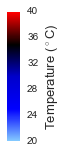

In [22]:
'''
====================
Customized colorbars
====================

This example shows how to build colorbars without an attached mappable.
'''
import matplotlib.pyplot as plt
import matplotlib as mpl

# Make a figure and axes with dimensions as desired.
fig = plt.figure(figsize=(0.2, 12))
ax1 = fig.add_axes([0.05, 0.80, 0.9, 0.15])

# Set the colormap and norm to correspond to the data for which
# the colorbar will be used.
cmap = cmap
norm = mpl.colors.Normalize(vmin=20, vmax=40)

# ColorbarBase derives from ScalarMappable and puts a colorbar
# in a specified axes, so it has everything needed for a standalone colorbar.  
# There are many more kwargs, but the following gives a basic
# continuous colorbar with ticks and labels.

cb1 = mpl.colorbar.ColorbarBase(ax1, cmap=cmap, norm=norm, orientation='vertical', ticks=[20,24,28,32,36,40])
cb1.set_label('Temperature ($^\circ$C)', fontsize=13)

plt.show()

In [26]:
# Topics: line, color, LineCollection, cmap, colorline, codex
'''
Defines a function colorline that draws a (multi-)colored 2D line with coordinates x and y.
The color is taken from optional data in z, and creates a LineCollection.

z can be:
- empty, in which case a default coloring will be used based on the position along the input arrays
- a single number, for a uniform color [this can also be accomplished with the usual plt.plot]
- an array of the length of at least the same length as x, to color according to this data
- an array of a smaller length, in which case the colors are repeated along the curve

The function colorline returns the LineCollection created, which can be modified afterwards.

See also: plt.streamplot
'''

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
from matplotlib.colors import ListedColormap, BoundaryNorm

#cmap2='brg'
#cmap2='gnuplot2'
#cmap2='GnBu'
#cmap2='cool'
#cmap2='jet'
#cmap2='nipy_spectral'
#cmap2=plt.get_cmap('viridis')
cmap2 = mpl.colors.ListedColormap(['g', 'b', '#FFFF00', 'k'])
#cmap2 = mpl.colors.ListedColormap(['b', 'g', 'y', 'r'])
#cmap2 = sns.palplot(sns.cubehelix_palette(8))
#cmap2 = 'ocean'

# Data manipulation:
def make_segments(x, y):
    '''
    Create list of line segments from x and y coordinates, in the correct format for LineCollection:
    an array of the form numlines x (points per line) x 2 (x and y) array
    '''

    points = np.array([x, y]).T.reshape(-1, 1, 2)
    segments = np.concatenate([points[:-1], points[1:]], axis=1)
    
    return segments

# Interface to LineCollection:
def colorline2(x, y, z=None, cmap=cmap2, norm=plt.Normalize(0,40), linewidth=3, alpha=1.0):
    '''
    Plot a colored line with coordinates x and y
    Optionally specify colors in the array z
    Optionally specify a colormap, a norm function and a line width
    '''
    
    # Default colors equally spaced on [0,1]:
    if z is None:
        z = np.linspace(0.0, 1.0, len(y))
           
    # Special case if a single number:
    if not hasattr(z, "__iter__"):  # to check for numerical input -- this is a hack
        z = np.array([z])
        
    z = np.asarray(y)
    
    segments = make_segments(x, y)
    lc2 = LineCollection(segments, array=z, cmap=cmap2, norm=plt.Normalize(0,40), linewidth=linewidth, alpha=alpha)
    
    ax1 = plt.gca()
    ax1.add_collection(lc2)
    
    return lc2
        
def clear_frame(ax1=None):
    if ax1 is None: 
        ax1 = plt.gca() 
    ax1.xaxis.set_visible(False) 
    ax1.yaxis.set_visible(False) 
    for spine in ax1.spines.itervalues(): 
        spine.set_visible(False)

In [27]:
# KMO alb-cre Vehicle
#  AP   (10) - 415, 416, 421, 422, 432, 439, 440, 449, 450, 451

# KMO alb-cre Minipump
#  AP   (7) - 411, 420, 430, 431, 436, 438, 452

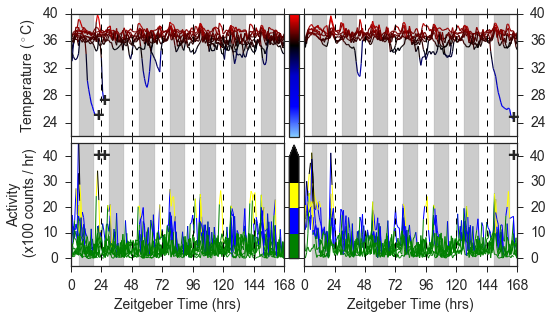

In [38]:
sns.set_context("notebook"); sns.set_style("ticks"); fig = plt.figure(figsize=(8.0, 5.0)) 
gs1 = gridspec.GridSpec(2, 3, width_ratios=[1,0.08,1], wspace=0.01, hspace=0.06)

ax0 = plt.subplot(gs1[0]);ax0.tick_params(labelsize=12) #AP Vehicle
colorline(df5A415['ZT'][0:10080], df5A415['temp'][0:10080], linewidth=1.2)
colorline(df5A416['ZT'][0:10080], df5A416['temp'][0:10080], linewidth=1.2)
colorline(df5A421['ZT'][0:10080], df5A421['temp'][0:10080], linewidth=1.2)
colorline(df5A422['ZT'][0:10080], df5A422['temp'][0:10080], linewidth=1.2)
colorline(df5A432['ZT'][0:10080], df5A432['temp'][0:10080], linewidth=1.2)
colorline(df5A439['ZT'][0:10080], df5A439['temp'][0:10080], linewidth=1.2)
colorline(df5A440['ZT'][0:10080], df5A440['temp'][0:10080], linewidth=1.2)
colorline(df5A449['ZT'][0:10080], df5A449['temp'][0:10080], linewidth=1.2)
colorline(df5A450['ZT'][0:10080], df5A450['temp'][0:10080], linewidth=1.2)
colorline(df5A451['ZT'][0:10080], df5A451['temp'][0:10080], linewidth=1.2)

ax0.text(21, 25.0, "+", ha="center", va="center", rotation=0, size=20, fontweight='bold') #A415
ax0.text(26, 27.2, "+", ha="center", va="center", rotation=0, size=20, fontweight='bold') #A450

ax0.tick_params(labelsize=14)
plt.plot([24, 24], [20, 50], 'k--', lw=1); plt.plot([48, 48], [20, 50], 'k--', lw=1)
plt.plot([72, 72], [20, 50], 'k--', lw=1); plt.plot([96, 96], [20, 50], 'k--', lw=1)
plt.plot([120, 120], [20, 50], 'k--', lw=1); plt.plot([144, 144], [20, 50], 'k--', lw=1)
plt.ylabel('Temperature ($^\circ$C)', fontsize=14)
ax0.set_xticks([0, 24, 48, 72, 96, 120, 144, 168])
ax0.axvspan(6,18,color='k',alpha=0.2);ax0.axvspan(30,42,color='k',alpha=0.2);
ax0.axvspan(54,66,color='k',alpha=0.2); ax0.axvspan(78,90, color='k', alpha=0.2)
ax0.axvspan(102,114,color='k',alpha=0.2);ax0.axvspan(126,138,color='k',alpha=0.2);
ax0.axvspan(150,162,color='k',alpha=0.2); 
ax0.yaxis.set_ticks(np.arange(24.0,42.01,4.0))
ax0.set_ylim(22.0,40.0); ax0.set_xlim(0,168); ax0.xaxis.set_ticklabels([])

ax1 = plt.subplot(gs1[1])
norm = mpl.colors.Normalize(vmin=22, vmax=40)
cb1 = mpl.colorbar.ColorbarBase(ax1, cmap=cmap, norm=norm, orientation='vertical', ticks=[20,24,28,32,36,40])
ax1.yaxis.set_ticks_position('none')
ax1.yaxis.set_ticklabels([]);ax1.tick_params(labelsize=12)
plt.subplots_adjust(bottom=0.2, wspace = 0.01)
ax1.set_position([0.504, 0.558, 0.017, 0.342]) #More Right, MoreUp, MoreWidth, More Height

ax2 = plt.subplot(gs1[2]); ax2.tick_params(labelsize=12) #AP Drug
colorline(df5A411['ZT'][0:10080], df5A411['temp'][0:10080], linewidth=1.2)
colorline(df5A420['ZT'][0:10080], df5A420['temp'][0:10080], linewidth=1.2)
colorline(df5A430['ZT'][0:10080], df5A430['temp'][0:10080], linewidth=1.2)
colorline(df5A431['ZT'][0:10080], df5A431['temp'][0:10080], linewidth=1.2)
colorline(df5A436['ZT'][0:10080], df5A436['temp'][0:10080], linewidth=1.2)
colorline(df5A438['ZT'][0:10080], df5A438['temp'][0:10080], linewidth=1.2)
colorline(df5A452['ZT'][0:10080], df5A452['temp'][0:10080], linewidth=1.2)
ax2.text(165, 24.6, "+", ha="center", va="center", rotation=0, size=20, fontweight='bold') #A436
ax2.tick_params(labelsize=14)
plt.plot([24, 24], [20, 50], 'k--', lw=1); plt.plot([48, 48], [20, 50], 'k--', lw=1)
plt.plot([72, 72], [20, 50], 'k--', lw=1); plt.plot([96, 96], [20, 50], 'k--', lw=1)
plt.plot([120, 120], [20, 50], 'k--', lw=1); plt.plot([144, 144], [20, 50], 'k--', lw=1)
ax2.set_xticks([0, 24, 48, 72, 96, 120, 144, 168])
ax2.axvspan(6,18, color='k', alpha=0.2);ax2.axvspan(30,42, color='k', alpha=0.2);
ax2.axvspan(54,66, color='k', alpha=0.2);ax2.axvspan(78,90, color='k', alpha=0.2);
ax2.axvspan(102,114, color='k', alpha=0.2);ax2.axvspan(126,138, color='k', alpha=0.2);
ax2.axvspan(150,162, color='k', alpha=0.2)
ax2.yaxis.set_ticks(np.arange(24.0, 42.01, 4.0));ax2.set_ylim(22.0, 40.0); ax2.set_xlim(0,168)
ax2.xaxis.set_ticklabels([]);ax2.yaxis.tick_right();ax2.yaxis.set_ticks_position('both')

ax3 = plt.subplot(gs1[3]); ax3.tick_params(labelsize=12) #AP - Vehicle
colorline2(df5A415['ZT'][0:10080], df5A415['actHund'][0:10080], linewidth=1.0)
colorline2(df5A416['ZT'][0:10080], df5A416['actHund'][0:10080], linewidth=1.0)
colorline2(df5A421['ZT'][0:10080], df5A421['actHund'][0:10080], linewidth=1.0)
colorline2(df5A422['ZT'][0:10080], df5A422['actHund'][0:10080], linewidth=1.0)
colorline2(df5A432['ZT'][0:10080], df5A432['actHund'][0:10080], linewidth=1.0)
colorline2(df5A439['ZT'][0:10080], df5A439['actHund'][0:10080], linewidth=1.0)
colorline2(df5A440['ZT'][0:10080], df5A440['actHund'][0:10080], linewidth=1.0)
colorline2(df5A449['ZT'][0:10080], df5A449['actHund'][0:10080], linewidth=1.0)
colorline2(df5A450['ZT'][0:10080], df5A450['actHund'][0:10080], linewidth=1.0)
colorline2(df5A451['ZT'][0:10080], df5A451['actHund'][0:10080], linewidth=1.0)
ax3.text(21, 40, "+", ha="center", va="center", rotation=0, size=20, fontweight='bold') #A415
ax3.text(26, 40, "+", ha="center", va="center", rotation=0, size=20, fontweight='bold') #A450
ax3.tick_params(labelsize=14)
plt.plot([24, 24], [-1000, 5000], 'k--', lw=1); plt.plot([48, 48], [-1000, 5000], 'k--', lw=1)
plt.plot([72, 72], [-1000, 5000], 'k--', lw=1); plt.plot([96, 96], [-1000, 5000], 'k--', lw=1)
plt.plot([120, 120], [-1000, 5000], 'k--', lw=1); plt.plot([144, 144], [-1000, 5000], 'k--', lw=1)
plt.ylabel('Activity\n (x100 counts / hr)', fontsize=14)
plt.xlabel('Zeitgeber Time (hrs)', fontsize=14)
ax3.set_xticks([0, 24, 48, 72, 96, 120, 144, 168])
ax3.axvspan(6,18,color='k',alpha=0.2);ax3.axvspan(30,42,color='k',alpha=0.2);
ax3.axvspan(54,66,color='k',alpha=0.2);ax3.axvspan(78,90, color='k', alpha=0.2);
ax3.axvspan(102,114,color='k',alpha=0.2);ax3.axvspan(126,138,color='k',alpha=0.2);
ax3.axvspan(150,162,color='k',alpha=0.2);
ax3.yaxis.set_ticks(np.arange(0,50,10))
ax3.set_ylim(-3,45); ax3.set_xlim(0,168)

ax4 = plt.subplot(gs1[4])
norm2 = mpl.colors.Normalize(vmin=0, vmax=40)
cb2 = mpl.colorbar.ColorbarBase(ax4, cmap=cmap2, norm=norm2, orientation='vertical', ticks=[0,10,20,30,40], 
                                extend='max', extendfrac=0.12) 
ax4.yaxis.set_ticks_position('none'); ax4.yaxis.set_ticklabels([]); ax4.tick_params(labelsize=12)
ax4.set_position([0.504, 0.220, 0.017, 0.316]) #More Right, MoreUp, MoreWidth, More Height

ax5 = plt.subplot(gs1[5]); ax5.tick_params(labelsize=12)
colorline2(df5A411['ZT'][0:10080], df5A411['actHund'][0:10080], linewidth=1.0)
colorline2(df5A420['ZT'][0:10080], df5A420['actHund'][0:10080], linewidth=1.0)
colorline2(df5A430['ZT'][0:10080], df5A430['actHund'][0:10080], linewidth=1.0)
colorline2(df5A431['ZT'][0:10080], df5A431['actHund'][0:10080], linewidth=1.0)
colorline2(df5A436['ZT'][0:10080], df5A436['actHund'][0:10080], linewidth=1.0)
colorline2(df5A438['ZT'][0:10080], df5A438['actHund'][0:10080], linewidth=1.0)
colorline2(df5A452['ZT'][0:10080], df5A452['actHund'][0:10080], linewidth=1.0)
ax5.tick_params(labelsize=14)
plt.plot([24, 24], [-1000, 5000], 'k--', lw=1); plt.plot([48, 48], [-1000, 5000], 'k--', lw=1)
plt.plot([72, 72], [-1000, 5000], 'k--', lw=1); plt.plot([96, 96], [-1000, 5000], 'k--', lw=1)
plt.plot([120, 120], [-1000, 5000], 'k--', lw=1); plt.plot([144, 144], [-1000, 5000], 'k--', lw=1)
plt.xlabel('Zeitgeber Time (hrs)', fontsize=14)
ax5.set_xticks([0, 24, 48, 72, 96, 120, 144, 168])
ax5.axvspan(6,18,color='k',alpha=0.2);ax5.axvspan(30,42,color='k',alpha=0.2);
ax5.axvspan(54,66,color='k',alpha=0.2);ax5.axvspan(78,90, color='k', alpha=0.2)
ax5.axvspan(102,114,color='k',alpha=0.2);ax5.axvspan(126,138,color='k',alpha=0.2);
ax5.axvspan(150,162,color='k',alpha=0.2); ax5.yaxis.set_ticks(np.arange(0,50,10))
ax5.set_ylim(-3,45); ax5.set_xlim(0,168)
ax5.yaxis.tick_right(); ax5.yaxis.set_ticks_position('both')
ax5.text(165, 40, "+", ha="center", va="center", rotation=0, size=20, fontweight='bold') #A436
#plt.savefig('Fig3G_21may18.png', dpi=600)
plt.show()